In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

In [ ]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    # fashion mnist have 10 classes
    pairs = []
    labels = []
    # get the minimum of images of all classes
    n = min([len(digit_indices[d]) for d in range(10)])-1

    for d in range(10):
      for i in range(n):
        # same class
        z1, z2 = digit_indices[d][i], digit_indices[d][i+1]
        pairs += [[x[z1], x[z2]]]
        inc = random.randrange(1, 10)
        dn = (inc+d)%10
        # diffs class
        z1, z2 = digit_indices[d][i], digit_indices[dn][i]
        pairs += [[x[z1], x[z2]]]
        # labels [pos, neg]
        labels += [1, 0]
    return np.array(pairs), np.array(labels)

def create_pairs_on_set(images, labels):
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    return pairs, y

def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [9]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images /= 255.0
test_images /= 255.0

# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

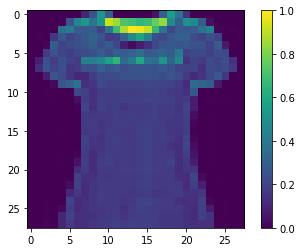

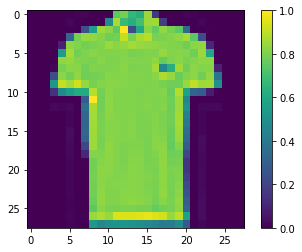

1.0


In [10]:
# array index
this_pair = 8

# show images at this index
show_image(ts_pairs[this_pair][0])
show_image(ts_pairs[this_pair][1])

# print the label for this pair
print(ts_y[this_pair])

In [13]:
def initialize_base_network():
  input = Input(shape=(28,28), name = 'base_input')
  x = Flatten(name = 'flatten_input')(input)
  x = Dense(units=128, activation='relu', name='first_base_dense')(x)
  x = Dropout(rate=0.1, name='first_dropout')(x)
  x = Dense(units =128, activation='relu', name='secod_base_dense')(x)
  x = Dropout(rate=0.1, name='second_dropout')(x)

  return Model(inputs=input, outputs=x)

def euclidean_distance(vects):
  '''
  Calculate euclidean between two vectors
  http://mathonline.wikidot.com/the-distance-between-two-vectors
  '''
  x, y = vects
  sum_squares = K.sum(K.square(x-y), axis=1, keepdims=True)
  # K.epsilon() = 1e-07 -> prevent number goes to small
  return K.sqrt(K.maximum(sum_squares, K.epsilon()))

def eucl_dist_output_shape(shapes):
  shape1, shape2 = shapes
  return (shape1[0], 1)

In [14]:
base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

ImportError: ignored

In [15]:
# create the left input and point to the base network
input_a = Input(shape=(28, 28), name='left_input')
vector_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28, 28), name='right_input')
vector_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
lambda_layer = Lambda(function=euclidean_distance, output_shape=eucl_dist_output_shape, name='output_layer')
output = lambda_layer([vector_output_a, vector_output_b])

# specify the inputs and output of the model
model = Model(inputs=[input_a, input_b],outputs=output)

# plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')


ImportError: ignored